In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, BaseEnsemble, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import eli5
import shap
from sklearn import model_selection

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('../data/data_full_final.csv')

In [3]:
train_embedding = pd.read_csv('../data/train_AE_embeddings.csv')
test_embedding = pd.read_csv('../data/test_AE_embeddings.csv')
data_embedding = pd.concat([train_embedding,test_embedding],axis=0)

In [7]:
for col in data_embedding.columns:
    data[col] = data_embedding[col].values

In [5]:
data_embedding.shape

(60856, 12)

In [8]:
data.shape

(60856, 726)

In [9]:
cols = list(data.columns)
cols.remove('RESULT')

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
clf = MinMaxScaler((0,1))

In [12]:
data_scaled = clf.fit_transform(data[cols])

C:\Users\asengup6\Softwares\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
from sklearn.cluster import KMeans

In [18]:
distortions = []
K = np.arange(10,100,10)
for k in K:
    kmeanModel = KMeans(n_clusters=int(k)).fit(data_scaled)
    distortions.append(kmeanModel.inertia_)
    print (k)

10
20
30
40
50
60
70
80
90


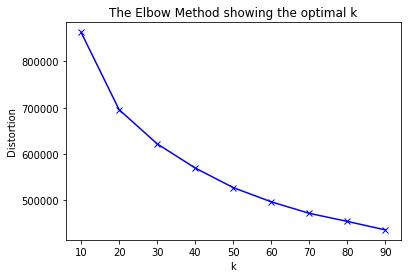

In [19]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
kmeanModel = KMeans(n_clusters=int(20)).fit(data_scaled)

In [22]:
data['cluster_id'] = kmeanModel.labels_

In [24]:
data.groupby(['cluster_id'])['RESULT'].value_counts(normalize=True)

cluster_id  RESULT
0           0.0       0.782883
            1.0       0.217117
1           0.0       0.868682
            1.0       0.131318
2           0.0       0.886473
            1.0       0.113527
3           0.0       0.855601
            1.0       0.144399
4           0.0       0.850177
            1.0       0.149823
5           0.0       0.816716
            1.0       0.183284
6           0.0       0.862084
            1.0       0.137916
7           0.0       0.867634
            1.0       0.132366
8           0.0       0.782348
            1.0       0.217652
9           0.0       0.887090
            1.0       0.112910
10          0.0       0.854676
            1.0       0.145324
11          0.0       0.873200
            1.0       0.126800
12          0.0       0.781848
            1.0       0.218152
13          0.0       0.805953
            1.0       0.194047
14          0.0       0.825967
            1.0       0.174033
15          0.0       1.000000
16          0.0     

In [25]:
data.cluster_id.value_counts()

8     6515
19    5917
3     5187
5     3721
12    3658
0     3482
11    3194
17    3168
16    2918
14    2896
10    2780
13    2654
2     2484
6     2313
7     2274
9     2223
1     1919
15    1313
4     1128
18    1112
Name: cluster_id, dtype: int64